In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import re
import spacy


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Balen Shah

In [4]:
data_path = '/content/drive/My Drive/Devanagari/Balen_Devanagari_final.csv'
df = pd.read_csv(data_path)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   video_id      2313 non-null   object 
 1   author        2310 non-null   object 
 2   published_at  2310 non-null   object 
 3   like_count    2310 non-null   float64
 4   text          1992 non-null   object 
 5   time_period   2313 non-null   object 
 6   script        2313 non-null   object 
dtypes: float64(1), object(6)
memory usage: 126.6+ KB


In [6]:
# Filter out rows with missing or empty text
df_filtered = df[df['text'].notna() & (df['text'] != '')]

# Reset the index to make sure row IDs are consecutive from 0
df_filtered.reset_index(drop=True, inplace=True)

# Now df_filtered will have the row IDs as a sequential number starting from 0


In [7]:
before_df = df_filtered[df_filtered['time_period'] == 'before_election']
after_df = df_filtered[df_filtered['time_period'] == 'after_election']

In [8]:
df1= before_df['text']
df2= after_df['text']

In [9]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df1:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines1 = list()
for line in all_sentences:
    words = line.split()
    for w in words:
       lines1.append(w)


print(lines1)

['युवा', 'बुद्धिमान,', 'प्रतिभाशाली,', 'ऊर्जावान', 'बालेन', 'बहुमुखी', 'प्रतिभाशाली', 'व्यक्ति', 'हुन्।', 'उनको', 'विशाल', 'प्रशंसक', 'मेयर', 'बन्ने', 'केबीआर', 'सुनेर', 'खोज', 'गरिरहेँ', 'हेर', 'आउने', 'कती', 'जान', 'हुनहुन्क्स<br>शुभकामना', 'दाजु', 'यसलाई', 'जारी', 'राख्नुहोस्', 'बालेन', 'शाह', 'अर्को', 'दिउँसो', 'बालेनलाई', 'भोट', 'दिनुहोस्', 'बान्नन्न्काआएइ', '<br>IYKYK', 'बलेन', 'जी', 'लै', 'मेरो', 'सुजाब', '<br>१.गफ', 'हान्डै', 'हिड्नु', 'वान्डा..', 'हरेक', 'इन्जिनियरिङ,', 'अवलोकन..', 'संगा', 'कोल्ज', 'मै', 'गयारा', 'समन्वय', 'गरनु', 'पर्यो..', 'शिक्षित', 'युवाहरु', 'हारु', 'तापीको', 'साथ', 'हुनसक्छ।', 'भोट', 'didaina<br><br>२.अजै', 'धुपारी', 'समय', 'xa', 'इन्जिनियरिङ', 'कक्षा', 'अनलाइन', 'दिन', 'सकनु', 'वो', 'वने', 'आजै', 'रामरो...', 'ड्राइंग', 'हरु', 'को', 'आधारभूत', 'देखि', 'जटिल', 'पढाइ', 'सिक्कानु', 'भो', 'वाने..', 'यसले', 'ठूलो', 'क्रान्ति', 'गर्नेछ<br>3।', 'र्\u200dयाप', 'ले', 'युवा', 'लाइ', 'प्रमोट', 'गर्क्सा', 'भाने..', 'लोक', 'धोरी', 'मञ्च', 'जस्तै', 'इन्द्रेणी', 'मा', 

In [10]:
import re

lines1 = [re.sub(r'[^अ-ह़\w]+', '', x) for x in lines1]

lines1_final = []

for word in lines1:
    if word != '':
        lines1_final.append(word)

lines1_final


['यव',
 'बदधमन',
 'परतभशल',
 'ऊरजवन',
 'बलन',
 'बहमख',
 'परतभशल',
 'वयकत',
 'हन',
 'उनक',
 'वशल',
 'परशसक',
 'मयर',
 'बनन',
 'कबआर',
 'सनर',
 'खज',
 'गररह',
 'हर',
 'आउन',
 'कत',
 'जन',
 'हनहनकसbrशभकमन',
 'दज',
 'यसलई',
 'जर',
 'रखनहस',
 'बलन',
 'शह',
 'अरक',
 'दउस',
 'बलनलई',
 'भट',
 'दनहस',
 'बननननकआएइ',
 'brIYKYK',
 'बलन',
 'ज',
 'ल',
 'मर',
 'सजब',
 'br१गफ',
 'हनड',
 'हडन',
 'वनड',
 'हरक',
 'इनजनयरङ',
 'अवलकन',
 'सग',
 'कलज',
 'म',
 'गयर',
 'समनवय',
 'गरन',
 'परय',
 'शकषत',
 'यवहर',
 'हर',
 'तपक',
 'सथ',
 'हनसकछ',
 'भट',
 'didainabrbr२अज',
 'धपर',
 'समय',
 'xa',
 'इनजनयरङ',
 'ककष',
 'अनलइन',
 'दन',
 'सकन',
 'व',
 'वन',
 'आज',
 'रमर',
 'डरइग',
 'हर',
 'क',
 'आधरभत',
 'दख',
 'जटल',
 'पढइ',
 'सककन',
 'भ',
 'वन',
 'यसल',
 'ठल',
 'करनत',
 'गरनछbr3',
 'रयप',
 'ल',
 'यव',
 'लइ',
 'परमट',
 'गरकस',
 'भन',
 'लक',
 'धर',
 'मञच',
 'जसत',
 'इनदरण',
 'म',
 'गयर',
 'बढ',
 'पख',
 'ल',
 'परमट',
 'गरन',
 'परbr4',
 'यटयब',
 'म',
 'समत',
 'नवई',
 'सरवजनक',
 'म',
 'दख',
 'परन',
 'पर',
 'अचममक',
 'अप',


In [11]:
nepali_stop_words = {
    'हो', 'को', 'र', 'यो', 'छ', 'पनि', 'के', 'कुरा', 'त', 'एक', 'म', 'उहाँ', 'तिमी', 'गर्ने'
    'हामी', 'तिमीहरू', 'हामीहरू', 'उसको', 'उनी', 'तिनी', 'माथि', 'नीचे', 'आदि', 'मात्र', 'तर','लाई', 'देश', 'ले', 'मा', 'अब', 'नै', 'जनता', 'काम', 'नेपाल', 'अनि', 'वर्ष', 'हुन', 'हो', 'भएको', 'थियो', 'के', 'तपाईं', 'साथ', 'कुरा', 'यो', 'उहाँ', 'छ', 'र', 'हो', 'पनि', 'गर्दैन', 'हरु', '।' }

# Remove stop words
stem1 = [word for word in lines1_final if word not in nepali_stop_words]

stem1

['यव',
 'बदधमन',
 'परतभशल',
 'ऊरजवन',
 'बलन',
 'बहमख',
 'परतभशल',
 'वयकत',
 'हन',
 'उनक',
 'वशल',
 'परशसक',
 'मयर',
 'बनन',
 'कबआर',
 'सनर',
 'खज',
 'गररह',
 'हर',
 'आउन',
 'कत',
 'जन',
 'हनहनकसbrशभकमन',
 'दज',
 'यसलई',
 'जर',
 'रखनहस',
 'बलन',
 'शह',
 'अरक',
 'दउस',
 'बलनलई',
 'भट',
 'दनहस',
 'बननननकआएइ',
 'brIYKYK',
 'बलन',
 'ज',
 'ल',
 'मर',
 'सजब',
 'br१गफ',
 'हनड',
 'हडन',
 'वनड',
 'हरक',
 'इनजनयरङ',
 'अवलकन',
 'सग',
 'कलज',
 'गयर',
 'समनवय',
 'गरन',
 'परय',
 'शकषत',
 'यवहर',
 'हर',
 'तपक',
 'सथ',
 'हनसकछ',
 'भट',
 'didainabrbr२अज',
 'धपर',
 'समय',
 'xa',
 'इनजनयरङ',
 'ककष',
 'अनलइन',
 'दन',
 'सकन',
 'व',
 'वन',
 'आज',
 'रमर',
 'डरइग',
 'हर',
 'क',
 'आधरभत',
 'दख',
 'जटल',
 'पढइ',
 'सककन',
 'भ',
 'वन',
 'यसल',
 'ठल',
 'करनत',
 'गरनछbr3',
 'रयप',
 'ल',
 'यव',
 'लइ',
 'परमट',
 'गरकस',
 'भन',
 'लक',
 'धर',
 'मञच',
 'जसत',
 'इनदरण',
 'गयर',
 'बढ',
 'पख',
 'ल',
 'परमट',
 'गरन',
 'परbr4',
 'यटयब',
 'समत',
 'नवई',
 'सरवजनक',
 'दख',
 'परन',
 'पर',
 'अचममक',
 'अप',
 'हहहहह',
 'बलन',
 'ल',


In [12]:
!apt-get install -y fonts-noto


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core fonts-noto-extra
  fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
0 upgraded, 10 newly installed, 0 to remove and 49 not upgraded.
Need to get 317 MB of archives.
After this operation, 789 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto all 20201225-1build1 [16.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:2022

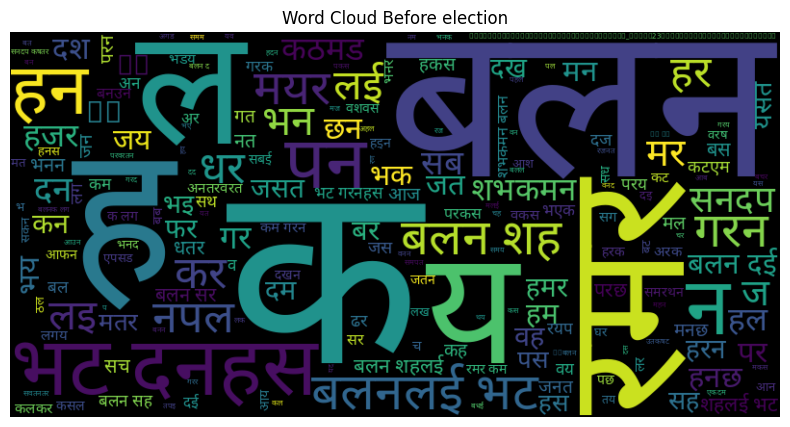

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up Noto Sans Devanagari font globally
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Noto Sans Devanagari'

# List of random Nepali words
nepali_words = stem1

# Create a string of all words
word_string = " ".join(nepali_words)

# Create a word cloud using the string of Nepali words
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf",
                      width=800, height=400).generate(word_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before election')
plt.show()

In [14]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df2:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines2 = list()
for line in all_sentences:
    words = line.split()
    for w in words:
       lines2.append(w)


print(lines2)

['जय', 'बालेन', 'महाकाव्य', 'मेयर।', 'साहब।', 'बालेन।', 'शाह।', 'जिन्दाबाद।', 'राम्रा', 'र्\u200dयाप', 'गीतहरू।', 'जय', 'नेपाल', 'जय', 'बालेन', '..', 'शाह', '..', 'सुर्खेतबाट', 'माया', 'जथा', 'म्याम्पाखा', 'अझै', 'पनि', 'र्\u200dयापर', 'हुन्', 'दुई', 'मलाई', 'ले', 'पानी', 'यही', 'गरि', 'राको', 'छस', 'माछिकने', 'आई', 'नेपल', 'सत्य', 'बडी', 'र', 'यथार्थ', 'बडी', 'बलेन,', 'जिन्दाबाद।', 'तपाईहरु', 'सबै', 'साथमा', 'हुनुहुन्छ', '।', '२०८०', 'मा', 'जो', 'कोही।', 'बलेब', 'असल', 'नेता', '<a', 'href="http://www.youtube.com/results?search_query=%23cab">#CAB</a>', 'लायाउच्चा', 'दुक्क', 'हुनुस', '@balenmayersahab', 'बालेन', 'जी', 'काठमाडौको', 'फोहर', 'बाहुन', 'क्षेत्रिको', 'पार्टी', 'कार्यालयमा', 'थुपर्डा', 'हुनछ', '।', 'बलेन', 'साह', 'लाई', 'धेरै', 'धेरै', 'धन्यवाद', 'विकरामवाहबुर', 'राम्रो', 'काम', 'भाइ।', 'मुजी', 'बालेन!', 'र्\u200dयाप', 'गीत', 'भिडियो', 'दामी', 'बिहारी', 'गीत', 'किन', 'हलनु', 'नेपाली', 'गीत', 'सब', 'हरको', 'हो', 'देश', 'बता', 'बालेन', 'दाई', 'सबैभन्दा', 'राम्रो', 'छ।', 'राम्रो'

In [15]:
import re

lines2 = [re.sub(r'[^अ-ह़\w]+', '', x) for x in lines2]

lines2_final = []

for word in lines2:
    if word != '':
        lines2_final.append(word)

lines2_final


['जय',
 'बलन',
 'महकवय',
 'मयर',
 'सहब',
 'बलन',
 'शह',
 'जनदबद',
 'रमर',
 'रयप',
 'गतहर',
 'जय',
 'नपल',
 'जय',
 'बलन',
 'शह',
 'सरखतबट',
 'मय',
 'जथ',
 'मयमपख',
 'अझ',
 'पन',
 'रयपर',
 'हन',
 'दई',
 'मलई',
 'ल',
 'पन',
 'यह',
 'गर',
 'रक',
 'छस',
 'मछकन',
 'आई',
 'नपल',
 'सतय',
 'बड',
 'र',
 'यथरथ',
 'बड',
 'बलन',
 'जनदबद',
 'तपईहर',
 'सब',
 'सथम',
 'हनहनछ',
 '२०८०',
 'म',
 'ज',
 'कह',
 'बलब',
 'असल',
 'नत',
 'a',
 'hrefhttpwwwyoutubecomresultssearch_query23cabCABa',
 'लयउचच',
 'दकक',
 'हनस',
 'balenmayersahab',
 'बलन',
 'ज',
 'कठमडक',
 'फहर',
 'बहन',
 'कषतरक',
 'परट',
 'करयलयम',
 'थपरड',
 'हनछ',
 'बलन',
 'सह',
 'लई',
 'धर',
 'धर',
 'धनयवद',
 'वकरमवहबर',
 'रमर',
 'कम',
 'भइ',
 'मज',
 'बलन',
 'रयप',
 'गत',
 'भडय',
 'दम',
 'बहर',
 'गत',
 'कन',
 'हलन',
 'नपल',
 'गत',
 'सब',
 'हरक',
 'ह',
 'दश',
 'बत',
 'बलन',
 'दई',
 'सबभनद',
 'रमर',
 'छ',
 'रमर',
 'वह',
 'br',
 '२५',
 'लख',
 'भय',
 'br',
 '७३',
 'हजर',
 'लइक',
 'सकदन',
 'ह',
 'सकदनस',
 'शकषत',
 'मयर',
 'सग',
 'दइ',
 'आब',
 'कप',
 'गफड'

In [16]:
nepali_stop_words = {
    'हो', 'को', 'र', 'यो', 'छ', 'पनि', 'के', 'कुरा', 'त', 'एक', 'म', 'उहाँ', 'तिमी', 'गर्ने'
    'हामी', 'तिमीहरू', 'हामीहरू', 'उसको', 'उनी', 'तिनी', 'माथि', 'नीचे', 'आदि', 'मात्र', 'तर','लाई', 'देश', 'ले', 'मा', 'अब', 'नै', 'जनता', 'काम', 'नेपाल', 'अनि', 'वर्ष', 'हुन', 'हो', 'भएको', 'थियो', 'के', 'तपाईं', 'साथ', 'कुरा', 'यो', 'उहाँ', 'छ', 'र', 'हो', 'पनि', 'गर्दैन', 'हरु', '।' }

# Remove stop words
stem2 = [word for word in lines2_final if word not in nepali_stop_words]

stem2

['जय',
 'बलन',
 'महकवय',
 'मयर',
 'सहब',
 'बलन',
 'शह',
 'जनदबद',
 'रमर',
 'रयप',
 'गतहर',
 'जय',
 'नपल',
 'जय',
 'बलन',
 'शह',
 'सरखतबट',
 'मय',
 'जथ',
 'मयमपख',
 'अझ',
 'पन',
 'रयपर',
 'हन',
 'दई',
 'मलई',
 'ल',
 'पन',
 'यह',
 'गर',
 'रक',
 'छस',
 'मछकन',
 'आई',
 'नपल',
 'सतय',
 'बड',
 'यथरथ',
 'बड',
 'बलन',
 'जनदबद',
 'तपईहर',
 'सब',
 'सथम',
 'हनहनछ',
 '२०८०',
 'ज',
 'कह',
 'बलब',
 'असल',
 'नत',
 'a',
 'hrefhttpwwwyoutubecomresultssearch_query23cabCABa',
 'लयउचच',
 'दकक',
 'हनस',
 'balenmayersahab',
 'बलन',
 'ज',
 'कठमडक',
 'फहर',
 'बहन',
 'कषतरक',
 'परट',
 'करयलयम',
 'थपरड',
 'हनछ',
 'बलन',
 'सह',
 'लई',
 'धर',
 'धर',
 'धनयवद',
 'वकरमवहबर',
 'रमर',
 'कम',
 'भइ',
 'मज',
 'बलन',
 'रयप',
 'गत',
 'भडय',
 'दम',
 'बहर',
 'गत',
 'कन',
 'हलन',
 'नपल',
 'गत',
 'सब',
 'हरक',
 'ह',
 'दश',
 'बत',
 'बलन',
 'दई',
 'सबभनद',
 'रमर',
 'रमर',
 'वह',
 'br',
 '२५',
 'लख',
 'भय',
 'br',
 '७३',
 'हजर',
 'लइक',
 'सकदन',
 'ह',
 'सकदनस',
 'शकषत',
 'मयर',
 'सग',
 'दइ',
 'आब',
 'कप',
 'गफड',
 'परचणड',
 'हतयर

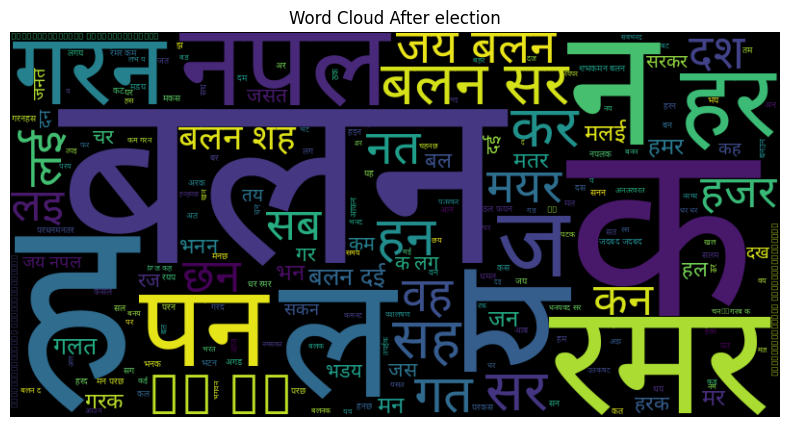

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set up Noto Sans Devanagari font globally
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Noto Sans Devanagari'

# List of random Nepali words
nepali_words = stem2

# Create a string of all words
word_string = " ".join(nepali_words)

# Create a word cloud using the string of Nepali words
wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/noto/NotoSansDevanagari-Regular.ttf",
                      width=800, height=400).generate(word_string)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After election')
plt.show()

In [18]:
df = pd.read_csv(data_path)

In [19]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="dpkrm/NepaliSentimentAnalysis")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/881 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


In [20]:
# Filter out rows with missing or empty text
df_filtered = df[df['text'].notna() & (df['text'] != '')]

# Reset the index to make sure row IDs are consecutive from 0
df_filtered.reset_index(drop=True, inplace=True)

# Now df_filtered will have the row IDs as a sequential number starting from 0


In [21]:
df_filtered

,video_id,author,published_at,like_count,text,time_period,script
0,5XkszPOC2Dg,@mybookismylife.2798,2022-05-16 04:25:15,27.0,"युवा बुद्धिमान, प्रतिभाशाली, ऊर्जावान बालेन बह...",before_election,Devanagari
1,5XkszPOC2Dg,@ganeshrasaeli1279,2022-05-19 22:02:42,2.0,मेयर बन्ने केबीआर सुनेर खोज गरिरहेँ हेर आउने क...,before_election,Devanagari
2,-WS50u_kjFw,@SurajKumar-ib9no,2022-05-25 18:38:51,0.0,बालेन शाह अर्को दिउँसो,before_election,Devanagari
3,UQBWAuoppkw,@netrabahadur262,2022-03-19 19:14:21,0.0,बालेनलाई भोट दिनुहोस्,before_election,Devanagari
4,5XkszPOC2Dg,@maskedhero5600,2022-05-18 14:39:18,0.0,बान्नन्न्काआएइ <br>IYKYK,before_election,Devanagari
...,...,...,...,...,...,...,...
1987,ki7Bb-eyP9s,@Eyevision2023,2024-02-21 22:49:08,55.0,दिल भूषण पाठक १२ भाई मध्यको एक भाई। चर्चा चलेक...,after_election,Devanagari
1988,5xOHw5tAMyA,@kamalbhandari8825,2024-02-07 16:42:46,0.0,रिशी धमुला जस्तो अन्पढ तोरी लाउरे सङ्ग बहस गरे...,after_election,Devanagari
1989,5xOHw5tAMyA,@Chandra_oficel,2023-09-18 22:58:14,0.0,जब सम्म टपरे ब्राहामन बाहुन छेत्री ले देस चलाउ...,after_election,Devanagari
1990,-WS50u_kjFw,@sonamrangdolsherpa3042,2023-05-23 13:44:04,0.0,अब आउने भावी नेपालकाे प्रधानमन्त्री बलेन जि ला...,after_election,Devanagari


In [22]:
# Example prediction logic with truncation
df_filtered['sentiment_label'] = None  # Initialize a new column for sentiment labels with None
df_filtered['confidence_score'] = None  # Initialize a new column for confidence scores with None

for i, text in enumerate(df_filtered['text']):  # Assuming 'text' is the column with the content
    result = pipe(text, truncation=True, padding=True, max_length=512)[0]  # Truncate and pad to 512 tokens
    df_filtered.at[i, 'sentiment_label'] = result['label']
    df_filtered.at[i, 'confidence_score'] = result['score']

# Display the updated DataFrame
print(df_filtered[['text', 'sentiment_label', 'confidence_score']].head())


<ipython-input-22-a5bc6cfc2f9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment_label'] = None  # Initialize a new column for sentiment labels with None
<ipython-input-22-a5bc6cfc2f9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['confidence_score'] = None  # Initialize a new column for confidence scores with None


KeyboardInterrupt: 

In [26]:
# Map the sentiment labels to corresponding names
label_mapping = {
    'LABEL_0': 'negative',
    'LABEL_1': 'positive',
    'LABEL_2': 'neutral'
}

# Apply the mapping to the 'sentiment_label' column
df_filtered['sentiment_label'] = df_filtered['sentiment_label'].map(label_mapping)

# Display the updated DataFrame
print(df_filtered[['text', 'sentiment_label', 'confidence_score']].head())


                                                text sentiment_label  \
0  युवा बुद्धिमान, प्रतिभाशाली, ऊर्जावान बालेन बह...             NaN   
1  मेयर बन्ने केबीआर सुनेर खोज गरिरहेँ हेर आउने क...             NaN   
2                             बालेन शाह अर्को दिउँसो             NaN   
3                              बालेनलाई भोट दिनुहोस्             NaN   
4                           बान्नन्न्काआएइ <br>IYKYK             NaN   

   confidence_score  
0          0.999686  
1          0.999939  
2          0.999534  
3          0.999738  
4          0.999915  


In [ ]:
# Saving the DataFrame to a CSV file in Google Drive
#df_filtered.to_csv('/content/drive/My Drive/Devanagari/Balen_merged_data_sentiment_Balen.csv', index=False)



In [44]:
df_filtered = pd.read_csv('/content/drive/My Drive/Devanagari/merged_data_sentiment_Balen.csv')

In [45]:
df_filtered

,video_id,author,published_at,like_count,text,time_period,script,sentiment_label,confidence_score
0,5XkszPOC2Dg,@mybookismylife.2798,2022-05-16 04:25:15,27.0,"युवा बुद्धिमान, प्रतिभाशाली, ऊर्जावान बालेन बह...",before_election,Devanagari,positive,0.999686
1,5XkszPOC2Dg,@ganeshrasaeli1279,2022-05-19 22:02:42,2.0,मेयर बन्ने केबीआर सुनेर खोज गरिरहेँ हेर आउने क...,before_election,Devanagari,negative,0.999939
2,-WS50u_kjFw,@SurajKumar-ib9no,2022-05-25 18:38:51,0.0,बालेन शाह अर्को दिउँसो,before_election,Devanagari,neutral,0.999534
3,UQBWAuoppkw,@netrabahadur262,2022-03-19 19:14:21,0.0,बालेनलाई भोट दिनुहोस्,before_election,Devanagari,neutral,0.999738
4,5XkszPOC2Dg,@maskedhero5600,2022-05-18 14:39:18,0.0,बान्नन्न्काआएइ <br>IYKYK,before_election,Devanagari,neutral,0.999915
...,...,...,...,...,...,...,...,...,...
1987,ki7Bb-eyP9s,@Eyevision2023,2024-02-21 22:49:08,55.0,दिल भूषण पाठक १२ भाई मध्यको एक भाई। चर्चा चलेक...,after_election,Devanagari,neutral,0.998843
1988,5xOHw5tAMyA,@kamalbhandari8825,2024-02-07 16:42:46,0.0,रिशी धमुला जस्तो अन्पढ तोरी लाउरे सङ्ग बहस गरे...,after_election,Devanagari,positive,0.993242
1989,5xOHw5tAMyA,@Chandra_oficel,2023-09-18 22:58:14,0.0,जब सम्म टपरे ब्राहामन बाहुन छेत्री ले देस चलाउ...,after_election,Devanagari,negative,0.994709
1990,-WS50u_kjFw,@sonamrangdolsherpa3042,2023-05-23 13:44:04,0.0,अब आउने भावी नेपालकाे प्रधानमन्त्री बलेन जि ला...,after_election,Devanagari,negative,0.992290


In [37]:
# Assuming 'time_period' is a column in your DataFrame and contains 'before_election' and 'after_election'
# and 'sentiment_label' contains the sentiment labels ('positive', 'negative', 'neutral')

# Filter for before_election and after_election
before_election_df = df_filtered[df_filtered['time_period'] == 'before_election']
after_election_df = df_filtered[df_filtered['time_period'] == 'after_election']

# Count sentiment labels for before_election
before_election_counts = before_election_df['sentiment_label'].value_counts()

# Count sentiment labels for after_election
after_election_counts = after_election_df['sentiment_label'].value_counts()

# Display the counts
print("Sentiment counts before election:")
print(before_election_counts)

print("\nSentiment counts after election:")
print(after_election_counts)


Sentiment counts before election:
sentiment_label
neutral     389
positive    330
negative    320
Name: count, dtype: int64

Sentiment counts after election:
sentiment_label
negative    332
positive    317
neutral     304
Name: count, dtype: int64


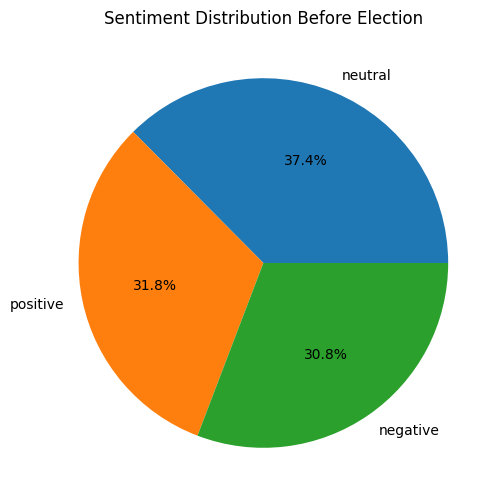

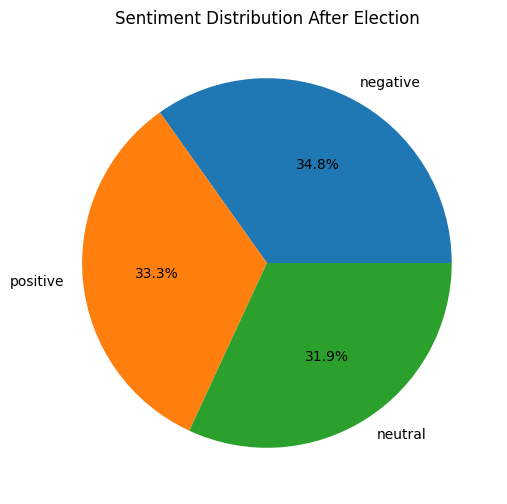

In [38]:
import matplotlib.pyplot as plt

# Plot the pie chart for before election
plt.figure(figsize=(6, 6))
before_election_counts.plot(kind='pie', autopct='%1.1f%%', labels=before_election_counts.index)
plt.title('Sentiment Distribution Before Election')
plt.ylabel('')  # Remove the label for better visualization
plt.show()

# Plot the pie chart for after election
plt.figure(figsize=(6, 6))
after_election_counts.plot(kind='pie', autopct='%1.1f%%', labels=after_election_counts.index)
plt.title('Sentiment Distribution After Election')
plt.ylabel('')  # Remove the label for better visualization
plt.show()


In [39]:
# Define a list of Nepali stopwords (you can add more words to this list if needed)
nepali_stopwords = [
    'हो', 'को', 'र', 'यो', 'छ', 'पनि', 'के', 'कुरा', 'त', 'एक', 'म', 'उहाँ', 'तिमी', 'गर्ने'
    'हामी', 'तिमीहरू', 'हामीहरू', 'उसको', 'उनी', 'तिनी', 'माथि', 'नीचे', 'आदि', 'मात्र', 'तर','लाई', 'देश', 'ले', 'मा', 'अब', 'नै', 'जनता', 'काम', 'नेपाल', 'अनि', 'वर्ष', 'हुन', 'हो', 'भएको', 'थियो', 'के', 'तपाईं', 'साथ', 'कुरा', 'यो', 'उहाँ', 'छ', 'र', 'हो', 'पनि', 'गर्दैन', 'हरु', '।'
    # Add any additional words you find unnecessary here
]

# Add English stopwords if you're also analyzing English texts
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = set(stopwords.words('english'))

# Combine Nepali and English stopwords (optional)
stopwords_combined = set(nepali_stopwords + list(english_stopwords))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
import string  # Add this import at the top of your code

# Filter the words to exclude stopwords
def clean_text_without_stopwords(text, stopwords_combined):
    # Convert text to lowercase, remove punctuation, and split into words
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])  # This removes punctuation
    return [word for word in text.split() if word not in stopwords_combined]

# Apply the cleaning function to the text columns
before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


<ipython-input-40-10072db0a911>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_election_df['cleaned_text'] = before_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)
<ipython-input-40-10072db0a911>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_election_df['cleaned_text'] = after_election_df['text'].apply(clean_text_without_stopwords, stopwords_combined=stopwords_combined)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


Top 10 Words Before Election:
       Word  Count
0     बालेन    163
1       भोट    147
2      बलेन    126
3  दिनुहोस्     84
4    राम्रो     69
5       शाह     60
6  बालेनलाई     58
7      मेयर     49
8      पानी     44
9     रामरो     41

Top 10 Words After Election:
     Word  Count
0   बालेन    199
1    बलेन    134
2      सर     80
3  राम्रो     74
4      br     71
5      जय     59
6     दाई     42
7    पानी     40
8     गीत     38
9    नेता     34


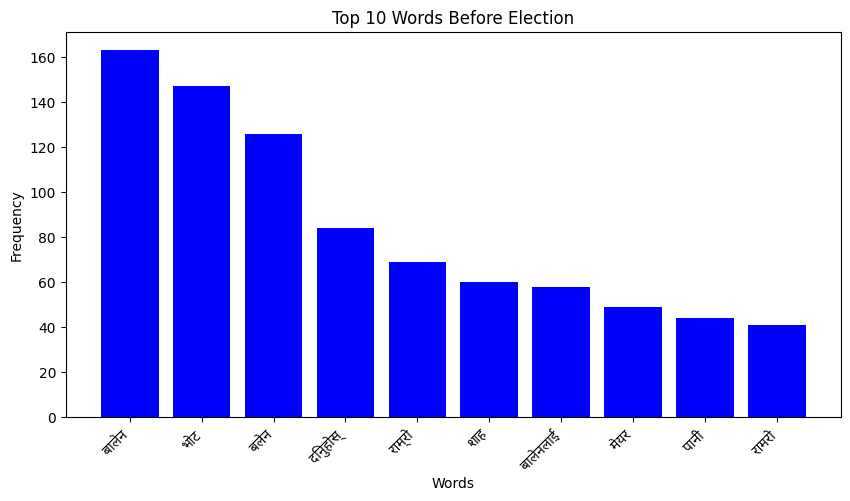

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 98 (b) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 114 (r) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


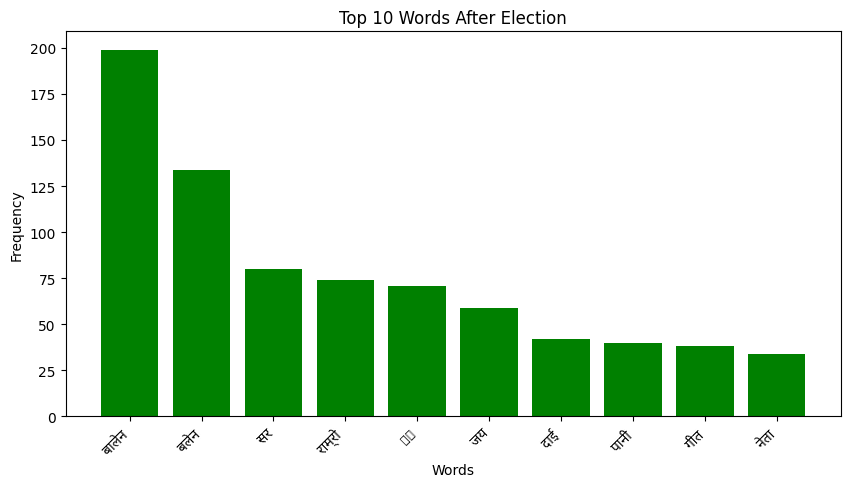

In [41]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
import requests

# Load Devanagari-compatible font dynamically
font_url = "https://github.com/googlefonts/noto-fonts/raw/main/hinted/ttf/NotoSansDevanagari/NotoSansDevanagari-Regular.ttf"
font_path = "NotoSansDevanagari-Regular.ttf"

# Download font if not already present
if not os.path.exists(font_path):
    response = requests.get(font_url)
    with open(font_path, 'wb') as f:
        f.write(response.content)

# Load the font
deva_font = fm.FontProperties(fname=font_path)



# Recalculate word frequencies
before_election_words = [word for text in before_election_df['cleaned_text'] for word in text]
after_election_words = [word for text in after_election_df['cleaned_text'] for word in text]

before_election_word_counts = Counter(before_election_words)
after_election_word_counts = Counter(after_election_words)

# Get the top 10 most common words
top_before_words = before_election_word_counts.most_common(10)
top_after_words = after_election_word_counts.most_common(10)

# Convert to DataFrame for easy visualization
before_top_words_df = pd.DataFrame(top_before_words, columns=['Word', 'Count'])
after_top_words_df = pd.DataFrame(top_after_words, columns=['Word', 'Count'])

# Print the top words
print("Top 10 Words Before Election:")
print(before_top_words_df)

print("\nTop 10 Words After Election:")
print(after_top_words_df)

# Plot the top words before election
plt.figure(figsize=(10, 5))
plt.bar(before_top_words_df['Word'], before_top_words_df['Count'], color='blue')
plt.title('Top 10 Words Before Election')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=deva_font)
plt.show()

# Plot the top words after election
plt.figure(figsize=(10, 5))
plt.bar(after_top_words_df['Word'], after_top_words_df['Count'], color='green')
plt.title('Top 10 Words After Election')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontproperties=deva_font)
plt.show()
